In [22]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [23]:
job_counts = df.job_title_short.value_counts()

job_counts

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

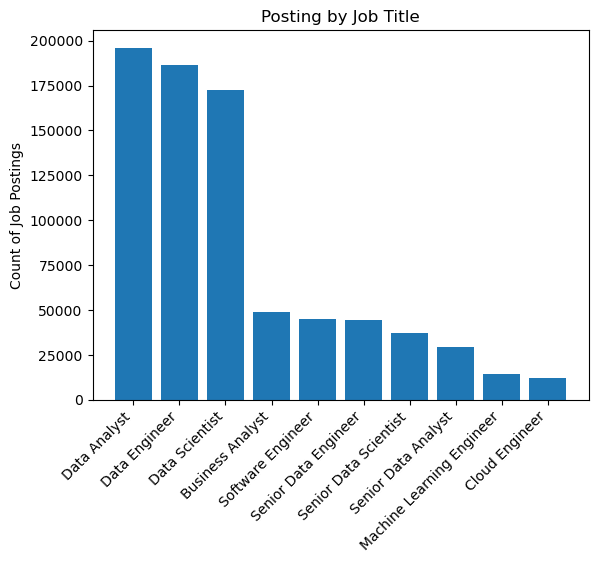

In [61]:
plt.bar(job_counts.index, job_counts)
plt.title('Posting by Job Title')
plt.ylabel('Count of Job Postings')
plt.xlabel("")
plt.xticks(rotation=45, ha='right')
plt.show()

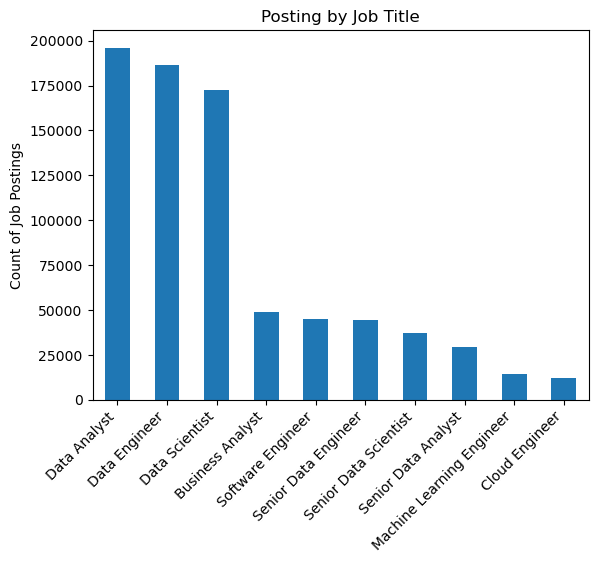

In [25]:
job_counts.plot(kind='bar')
plt.title('Posting by Job Title')
plt.ylabel('Count of Job Postings')
plt.xlabel("")
plt.xticks(rotation=45, ha='right')
plt.show()

In [26]:
df[['job_posted_date', 'salary_year_avg']].dropna(subset=['salary_year_avg'])

,job_posted_date,salary_year_avg
28,2023-08-01 13:37:57,109500.0
77,2023-06-26 14:22:54,140000.0
92,2023-02-21 13:29:59,120000.0
100,2023-07-31 13:01:18,228222.0
109,2023-10-12 13:02:19,89000.0
...,...,...
785624,2023-08-31 06:02:16,139216.0
785641,2023-01-04 16:36:07,150000.0
785648,2023-04-12 06:02:51,221875.0
785682,2023-03-04 06:16:08,157500.0


<Axes: xlabel='job_posted_date'>

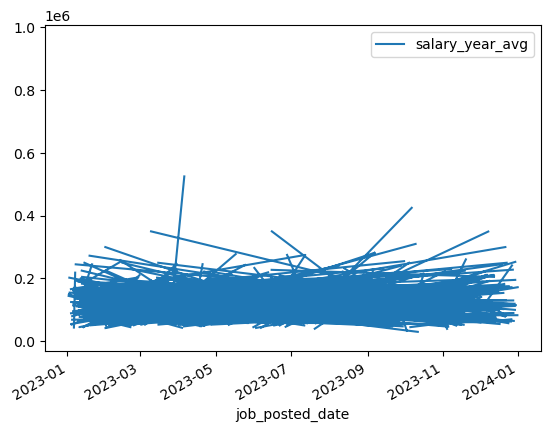

In [27]:
df.plot(x='job_posted_date', y='salary_year_avg', kind='line')

In [28]:
df['job_posted_month'] = df['job_posted_date'].dt.month

In [29]:
df[['job_posted_month', 'salary_year_avg']].dropna(subset=['salary_year_avg'])

,job_posted_month,salary_year_avg
28,8,109500.0
77,6,140000.0
92,2,120000.0
100,7,228222.0
109,10,89000.0
...,...,...
785624,8,139216.0
785641,1,150000.0
785648,4,221875.0
785682,3,157500.0


In [56]:
df_month = df.groupby('job_posted_month')['salary_year_avg'].agg( ['median', 'count']).sort_index()
df_month

,median,count
job_posted_month,,
1,115000.0,2296
2,115000.0,2010
3,117050.0,2204
4,115000.0,1876
5,115000.0,1911
6,115000.0,2331
7,115000.0,2219
8,115000.0,2095
9,117750.0,1246


In [57]:
print(df_month.columns)

Index(['median', 'count'], dtype='object')
